Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Provide full answers for each question, including interpretation of the results. Each question is worth 25 points.

This homework is due on Monday, November 30, 2015.

In [1]:
%matplotlib inline

## Question 1

The `titanic.xls` spreadsheet in the `data` directory contains data regarding the passengers on the Titanic when it sank in 1912. A recent [Kaggle competition](http://www.kaggle.com/c/titanic-gettingStarted) was based on predicting survival for passengers based on the attributes in the passenger list. 

Use scikit-learn to build both a support vector classifier and a logistic regression model to predict survival on the Titanic. Use cross-validation to assess your models, and try to tune them to improve performance.

Discuss the benefits and drawbacks of both approaches for application to such problems.

In [56]:
# Write your work here

import pandas as pd
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import time
import numpy as np

In [25]:
#Impute Missing Values
#Note: This is not my code. It is a code for dealing with strings and numbers simultaneously from
# http://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [155]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
# print(titanic.head())
titanic = DataFrameImputer().fit_transform(titanic)

In [27]:
newCols = titanic.columns.values
newCols[-1] = 'home'
titanic.columns = newCols
homeDest = titanic.pop("home")
print(titanic.columns.values)

le = preprocessing.LabelEncoder()
le.fit(titanic.sex)
titanic['sex'] = le.transform(titanic['sex'])

le = preprocessing.LabelEncoder()
for index, row in titanic.iterrows():
    titanic.iloc[index].cabin = str(row.cabin).replace(" ","")
    titanic.iloc[index,7] = str(titanic.iloc[index].ticket).replace(" ","")
    # print(row.ticket)
    # print(titanic.iloc[index].ticket)

le.fit(titanic.cabin)
titanic['cabin'] = le.transform(titanic['cabin'])

le.fit(titanic.ticket)
titanic['ticket'] = le.transform(titanic['ticket'])

le = preprocessing.LabelEncoder()
le.fit(titanic.embarked)
titanic['embarked'] = le.transform(titanic['embarked'])

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body']


In [28]:
survived = titanic.pop('survived')
y = survived.values
x = titanic[['pclass','sex','age','sibsp','parch','fare','body']].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
for row in x:
    if np.isreal(x).all():
        continue
    else:
        print("error in row")
        
cVals = [1,10,100,1000]
scoreBest = 0
cBest = np.nan
from sklearn import model_selection
for c in cVals:
    print("Testing c = " + str(c))
    svc = svm.SVC(kernel='linear',C=c)
    scores = model_selection.cross_val_score(svc,x_train,y_train,cv=5)
    score = sum(scores)/len(scores)
    if score>scoreBest:
        cBest = c
        scoreBest = score

print(cBest)
print(scoreBest)
svc = svm.SVC(kernel='linear',C=cBest).fit(x_train,y_train)

predTest = svc.predict(x_test)

pd.crosstab(y_test, predTest, rownames=["Actual"], colnames=["Predicted"])


Testing c = 1
Testing c = 10
Testing c = 100
Testing c = 1000
100
0.784532467532


Predicted,0,1
Actual,,
0,222,32
1,57,121


In [30]:
cVals = [1,10,100,1000]
scoreBest = 0
cBest = np.nan
from sklearn import model_selection
for c in cVals:
    print("Testing c = " + str(c))
    svc = svm.SVC(kernel='rbf',C=c)
    scores = model_selection.cross_val_score(svc,x_train,y_train,cv=5)
    score = sum(scores)/len(scores)
    if score>scoreBest:
        cBest = c
        scoreBest = score

print(cBest)
print(scoreBest)
svc = svm.SVC(kernel='rbf',C=cBest).fit(x_train,y_train)

predTest = svc.predict(x_test)

pd.crosstab(y_test, predTest, rownames=["Actual"], colnames=["Predicted"])

Testing c = 1
Testing c = 10
Testing c = 100
Testing c = 1000
1
0.667006493506


Predicted,0,1
Actual,,
0,233,21
1,126,52


In [31]:
#do logistic regression
from sklearn import svm, grid_search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 0.1, 0.05, 0.02, 0.01]
            }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid).fit(x_train,y_train)

# best hyperparameter setting
print(clf.best_params_)

#fit best model and predict
estimator = LogisticRegression(penalty='l2',C=clf.best_params_['C']).fit(x_train,y_train)
predTest = estimator.predict(x_test)

pd.crosstab(y_test, predTest, rownames=["Actual"], colnames=["Predicted"])

{'C': 0.1}


Predicted,0,1
Actual,,
0,229,25
1,69,109


In [32]:
param_grid = {'C': [10,1, 0.1, 0.05, 0.02, 0.01]
            }
clf = GridSearchCV(LogisticRegression(penalty='l1'), param_grid).fit(x_train,y_train)

# best hyperparameter setting
print(clf.best_params_)

#fit best model and predict
estimator = LogisticRegression(penalty='l2',C=clf.best_params_['C']).fit(x_train,y_train)
predTest = estimator.predict(x_test)

pd.crosstab(y_test, predTest, rownames=["Actual"], colnames=["Predicted"])

{'C': 1}


Predicted,0,1
Actual,,
0,229,25
1,62,116


Based on the results that we have, both SVM and logistic regression do a good job in predicting survival based on the covariates. SVMs outperform logistic regression slightly with lesser false positives as well as false negatives. The advantage of SVM is that it can come up with decision boundaries that maximize the classification margin. Another obvious advantage of SVMs is the provision to use the "kernel trick". However, kernel tricks are not exclusive to SVMs and can be used for logistic regression as well. 

## Question 2

The data in `prostate.data.txt` come from a study by Stamey et al. (1989), which examined the correlation between the level of prostate-specific antigen (`lpsa`) and a number of clinical measures in men who were about to receive a radical prostatectomy. The variables are log cancer volume (`lcavol`), log prostate weight (`lweight`), age, log of the amount of benign prostatic hyperplasia (`lbph`), seminal vesicle invasion (`svi`), log of capsular penetration (`lcp`), Gleason score (`gleason`), and percent of Gleason scores 4 or 5 (`pgg45`). 

1. Select (your choice) five competing 3-variable linear regression models, and compare them using AIC, five-fold and ten-fold cross-validation. Discuss the results.

2. An alternative method for model assessment is to fit the models on a set of bootstrap samples, and then keep track of how well it predicts the original training set. If $\hat{f}^b(x_i)$ is the predicted value at $x_i$, from the model fitted to the bth bootstrap dataset, such an estimate is:
$$\frac{1}{B} \frac{1}{N} \sum_{b=1}^B \sum_{i=1}^N L(y_i,\hat{f}^b(x_i)) $$
However, because the bootstrap samples tend to contain many observations in common among the set of bootstrap samples, this estimate will tend to underestimate the true error rate. The so-called .632 estimator aleviates this bias by returning a weighted average of the training error (average loss over the training sample) and the leave-one-out (LOO) bootstrap error:
$$\hat{err}^{(.632)} = 0.368 \, \bar{err} + 0.632 \, \hat{err}^{(1)}$$
where:
$$\bar{err} = \frac{1}{N}\sum_{i=1}^N L(y_i, \hat{f}(x_i)) $$
Repeat the assesment from part (1) using the .632 estimator, and compare the result to the other approaches.

In [156]:
# Write your work here
#read the data
data = pd.read_table("../data/prostate.data.txt")
data.replace({'train':{'T':1,'F':0}},inplace=True)
data.drop(data.columns[0],axis=1,inplace=True)

In [146]:
aic = lambda n,rss,numParams: n + n*np.log(2*3.14) + n*np.log(rss/n) + 2*(numParams+1)

In [147]:
#create x and y values
y = data.pop('lpsa').values
mask = np.ones(len(data.columns.values),dtype=bool)
mask[-2] = 0
XAll = data[data.columns[mask]]
numColumns = len(XAll.columns.values)
n = len(data.index)#size of the data
n
aicCurr = aic(1,1,5)

In [154]:
selectedCovariates = np.zeros(5,dtype=object) #keep record of the performances of the covariates

numCompetitors = 5
# cvVals=10
#check variables for the loop
bestError10, bestIndex10, bestError5, bestIndex5, bestAIC, bestIndexAIC = 1e10,0,1e10,0,1e10,0
predictors = []

for roundPrediction in range(numCompetitors):
    #randomly select three columns
    choice = np.random.choice(numColumns,3,replace=False)
    predictors.append(choice)
    mask = np.zeros(len(data.columns.values),dtype=bool)
    mask[choice] = 1


    #get the selected covariates
    xCurr = XAll[XAll.columns[mask]].values

    from sklearn import linear_model, model_selection
    reg = linear_model.LinearRegression()

    #fit the object
    error10 = (sum(abs((model_selection.cross_val_score(reg,xCurr,y,cv=10,scoring='mean_squared_error'))))/10)
    error5 = (sum(abs((model_selection.cross_val_score(reg,xCurr,y,cv=5,scoring='mean_squared_error'))))/5)
    #calculte AIC
    reg.fit(xCurr,y)
    err = (np.sum((reg.predict(xCurr)-y)**2))
    aicCurr = aic(n,err,4)

    if error10 < bestError10:
        bestError10 = error10
        bestIndex10 = roundPrediction
    if error5 < bestError5:
        bestError5 = error5
        bestIndex5 = roundPrediction
    if aicCurr < bestAIC:
        bestAIC = aicCurr
        bestIndexAIC = roundPrediction
        
print("Best Predictors by 10 Round Cross Validation are: ")
print(XAll[XAll.columns[predictors[bestIndex10]]].columns.values)
print("Error in best prediction is: ")
print(bestError5)

print("Best Predictors by 5 Round Cross Validation are: ")
print(XAll[XAll.columns[predictors[bestIndex5]]].columns.values)
print("Error in best prediction is: ")
print(bestError10)

print("Best Predictors by AIC are: ")
print(XAll[XAll.columns[predictors[bestIndexAIC]]].columns.values)
print("Error in best prediction is: ")
print(error5)

Best Predictors by 10 Round Cross Validation are: 
['lweight' 'train' 'lcavol']
Error in best prediction is: 
0.912725585571
Best Predictors by 5 Round Cross Validation are: 
['lweight' 'train' 'lcavol']
Error in best prediction is: 
0.734461018736
Best Predictors by AIC are: 
['lweight' 'train' 'lcavol']
Error in best prediction is: 
0.912725585571


In [143]:
#PART 2: bootstrap sample
from sklearn.utils import resample
#had dropped y column. re-read. Not the best idea
data = pd.read_table("../data/prostate.data.txt")
data.replace({'train':{'T':1,'F':0}},inplace=True)

dataCopy = data.copy(deep=True)

data.drop(data.columns[0],axis=1,inplace=True)


numCompetitors = 5
cvVals=10
bestError, bestIndex = 1e10,0
predictors = []

bootstrapRounds = 5

for roundPrediction in range(numCompetitors):
#   print(data.columns.values)
    choice = np.random.choice(numColumns,3,replace=False)
    errorTraining = 0
    errorLOO = 0
    for roundBootStrap in range(bootstrapRounds):
        dataCopy = data.copy(deep=True)
        #mask to select the x covariates
        mask = np.ones(len(data.columns.values)-1,dtype=bool)#will get rid of y variable
        mask[-2] = 0

        dataBootstrap = resample(data)
        y = dataBootstrap.pop('lpsa').values
        XAll = dataBootstrap[dataBootstrap.columns[mask]]

        #randomly pick three convariates

        predictors.append(choice)
        #mask to select the three chosen covariates
        mask = np.zeros(len(XAll.columns.values),dtype=bool)
        mask[choice] = 1
        xCurr = XAll[XAll.columns[mask]].values
        reg.fit(xCurr,y)

        #calculate mean squared error on total data
        errorTrainingCurr = sum((reg.predict(data[data.columns[mask]].values) - dataCopy.pop('lpsa').values) ** 2)/len(data.index)

        #do LOO
        from sklearn import cross_validation
        loo = cross_validation.LeaveOneOut(len(data.index))
        errorLOOCurr = sum(abs(model_selection.cross_val_score(reg,xCurr,y,scoring='mean_squared_error',cv=loo,)))/len(data.index)
        
        errorTraining+=errorTrainingCurr
        errorLOO+=errorLOOCurr
        
    totalError = 0.368*errorTraining + 0.632*errorLOO

    if totalError<bestError:
        bestError = totalError
        bestIndex = roundPrediction

        #print(data.columns.values)


print("Best Predictors are: ")
print(XAll[XAll.columns[predictors[bestIndex]]].columns.values)
print("Error in best prediction is: ")
print(bestError/5)

Best Predictors are: 
['lbph' 'lcavol' 'gleason']
Error in best prediction is: 
0.580403800606


We see that .632 estimator performs better than finding the best model using Cross-Validation and the AIC models. However, this result varies and of the many runs that I tried, Cross-Validation and AIC often came out on top. Standard bootstrapping, often produced a bias (though reduced the variance) but it was corrected by using the 0.632 rule.

## Question 3

Fit a series of random-forest classifiers to the very low birthweight infant data (`vlbw.csv`), to explore the sensitivity to the parameter `m`, the number of variables considered for splitting at each step. Plot both the out-of-bag error as well as the test error against a suitably-chosen range of values for `m`.

['birth', 'exit', 'hospstay', 'lowph', 'pltct', 'race', 'bwt', 'gest', 'inout', 'twn', 'lol', 'magsulf', 'meth', 'toc', 'delivery', 'apg1', 'vent', 'pneumo', 'pda', 'cld', 'pvh', 'ivh', 'ipe', 'year', 'sex']


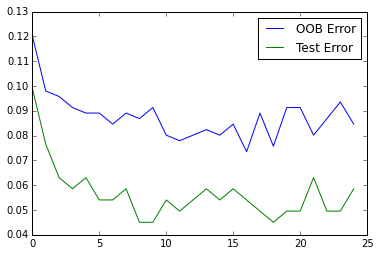

In [51]:
# Write your work here
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#read data
data = pd.read_csv("../data/vlbw.csv")
data.drop(data.columns[0],axis=1)
columnNames = list(data.columns.values)
data = data.ix[:,1:len(columnNames)]
# print(data.columns.values)
#print(data.head())
data = DataFrameImputer().fit_transform(data)

columnNames = list(data.columns.values)
xColumns = [col for col in columnNames if col != "dead"]
print(xColumns)

le = preprocessing.LabelEncoder()

for column in columnNames:
    le.fit(data[column])
    data[column] = le.transform(data[column])


y = data.pop("dead").values
x = data[xColumns].values
maxEstimators = len(xColumns)
# print(maxEstimators)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

oobErrors = []
testErrors = []

for counterEstimator in range(1,maxEstimators+1):
    randForestClass = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=counterEstimator)
    randForestClass.fit(x_train,y_train)
    #calculate test Error
    yPred = randForestClass.predict(x_test)
    #0s and 1s. Take NOT(XOR) to find non matches. 
    testResults = np.logical_not(np.logical_xor(yPred,y_test))
    testError = (len(testResults) - np.sum(testResults))/len(testResults)
    testErrors.append(testError)
    #calculate OOB Error
    oobError = 1 - randForestClass.oob_score_
#     print(oobError)
    oobErrors.append(oobError)

plt.plot(range(maxEstimators),oobErrors,label='OOB Error')
plt.plot(range(maxEstimators),testErrors,label='Test Error')
plt.legend()

We see that the OOB error is more than the Test Error. The reason for this, as mentioned in Efron and Tibshirani, (1993), is that "the bootstrap samples used to compute the [OOB error rate] are further away on the average than a typical test sample". Therefore the OOB error estimates are pessimistic in nature.

## Bonus: Question 4

Use a grid search to optimize the number of estimators and max_depth for a Gradient Boosted Decision tree using the very low birthweight infant data. Plug this optimal ``max_depth`` into a *single* decision tree.  Does this single tree over-fit or under-fit the data? Repeat this for the Random Forest.  Construct a single decision tree using the ``max_depth`` which is optimal for the Random Forest.  Does this single tree over-fit or under-fit the data?

In [8]:
# Write your work here
__author__ = 'ayanmukhopadhyay'

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



In [9]:
#read data
data = pd.read_csv("../data/vlbw.csv")
# print(data.columns.values)
data.drop(data.columns[0],axis=1,inplace=True)
data = DataFrameImputer().fit_transform(data)

columnNames = list(data.columns.values)
xColumns = [col for col in columnNames if col != "dead"]
# print(xColumns)

le = preprocessing.LabelEncoder()

for column in columnNames:
    le.fit(data[column])
    data[column] = le.transform(data[column])

from sklearn.model_selection import train_test_split
y = data.pop("dead").values
x = data[xColumns].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
maxEstimators = len(xColumns)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'max_depth': list(range(1,20)),
              'n_estimators' : [5,10,20,30]
              }

est = GradientBoostingClassifier(n_estimators=3000)
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
gs_cv.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [11]:
#now fit this max depth to a single decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_features="auto",max_depth=gs_cv.best_params_["max_depth"])
clf.fit(X_train, y_train)

print("Test Score")
print(clf.score(X_test,y_test))
print("Training Score")
print(clf.score(X_train, y_train))

Test Score
0.887387387387
Training Score
0.86859688196


In [12]:
param_grid = {'max_depth': list(range(1,30)),
#               'min_samples_leaf': [3, 5, 9, 17],
              'n_estimators': [10,100,500,1000,2000,3000]
              }
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=3000)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
print(gs_cv.best_params_)

#now fit this max depth to a single decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_features="auto",max_depth=gs_cv.best_params_["max_depth"])
clf.fit(X_train, y_train)

print("Test Score")
print(clf.score(X_test,y_test))
print("Training Score")
print(clf.score(X_train, y_train))

{'n_estimators': 500, 'max_depth': 9}
Test Score
0.887387387387
Training Score
0.993318485523


In order to check which of the two processes "overfit", I checked how well the methods fit to the training data used to learn the models and the difference between the test accuracy and the training accuracy. The second method, where a random forest classifier is learnt overfits the data used. However, when used on a test set, their performances are very similar.